# Important
To Execute a cell. Press Shift+Enter

In [2]:
#load all the necessary libraries
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

# Python Recap

In [3]:
# here is how you print something
a = 1
b = 2
c = a + b
print(c)

3


In [4]:
#conditional statement
x = 3
if x<5:
    print (x, 'is less than five')
else:
    print (x, 'is not less than five')

3 is less than five


In [5]:
#define a function
def f(x):
    a = 2*x + 1
    return a
print(f(10))

21


In [6]:
#while loop
i = 0
while i < 10:
    i+=1
    print(i, end='') #note the trailing comma this prevents newline

12345678910

In [7]:
#here is list and use it
a1 = [1,2,3,4,5,6]
for x in a1:
    print(x, end='')
print('----')
for i,x in enumerate(a1): #if you also want the index
    print(i, x)

123456----
0 1
1 2
2 3
3 4
4 5
5 6


In [8]:
#here is how to build one (not so beautiful)
#Also notice here that I use a1 from the previous cell.
#once you execute the code it's stored in the kernel
a2 = []
for x in a1:
    a2.append(2*x)
print (a2)

[2, 4, 6, 8, 10, 12]


In [9]:
#But this is ugly
#let us use list comprehension makes it much easier to read
a3 = [2*x+1 for x in a1]
print (a3)

[3, 5, 7, 9, 11, 13]


In [10]:
#but since we will be using it a lot we have something much better
#it's called numpy array

arr = np.linspace(0,1,10) #this gives you 10 number from 0 to 10 equally spaced 
print (arr)
print (2*arr) #array broadcasting magic it does what you think it should
print (arr**2)
print (np.exp(arr)) #exp function

#you can also convert normal list to numpy array if you want
arr3 = np.array(a3)
print(arr3*2)

[ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ]
[ 0.          0.22222222  0.44444444  0.66666667  0.88888889  1.11111111
  1.33333333  1.55555556  1.77777778  2.        ]
[ 0.          0.01234568  0.04938272  0.11111111  0.19753086  0.30864198
  0.44444444  0.60493827  0.79012346  1.        ]
[ 1.          1.11751907  1.24884887  1.39561243  1.5596235   1.742909
  1.94773404  2.17662993  2.43242545  2.71828183]
[ 6 10 14 18 22 26]


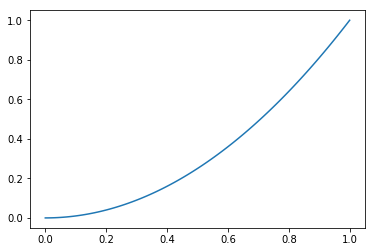

In [11]:
#plotting is easy
xs = np.linspace(0,1,100)
ys = xs**2
plt.plot(xs,ys)
plt.savefig('first_plot.pdf') #you can save it too

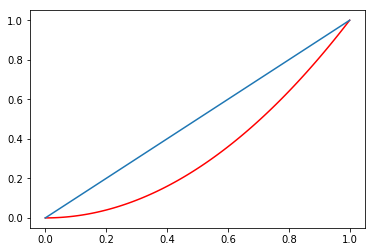

In [12]:
plt.plot(xs,ys, color='red') #change the style too
plt.plot(xs,xs) #and you can plot two things on the same graph
#It can do much more see: http://matplotlib.org/gallery.html

## Pre-exercise

1) Let us start easy. Give me a numpy array from -$\pi$ to +$\pi$. You can use math.PI for $\pi$. Let us called it `xs`

In [4]:
xs = np.linspace(-math.pi, math.pi, 100)

2) Built another numpy array called `ys` which is just the sin of `xs`

In [17]:
ys = np.sin(xs)

3) Plot `xs` vs `ys`

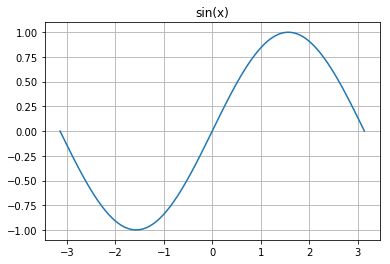

In [19]:
plt.plot(xs, ys)
plt.grid()
plt.title('sin(x)')

4) Plot 
$\begin{align} 
g(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} 
\end{align}$

In [20]:
g = lambda x: x - (x**3)/math.factorial(3) + (x**5)/math.factorial(5) - (x**7)/math.factorial(7)
gx = [g(i) for i in xs]

5) Plot g(x) and sin(x) on the same axis

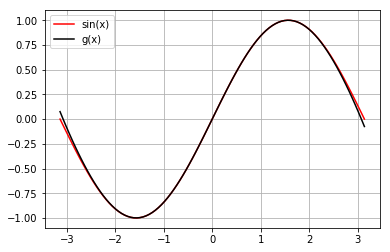

In [26]:
plt.plot(xs, ys, label="sin(x)", color='red')
plt.plot(xs, gx, label="g(x)", color='black')
plt.grid()
plt.legend()

6) Plot the $\sin$ function and the taylor series approximation( 1 term ) on the same axis

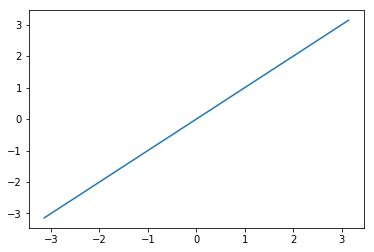

In [27]:
plt.plot(xs, xs)

7) Plot the $\sin$ function and the taylor series approximation( 1 term ) on the same axis

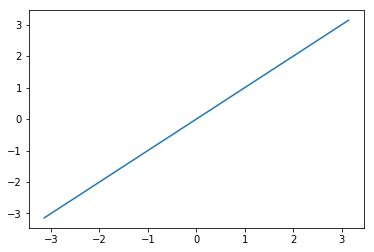

In [5]:
plt.plot(xs, xs, label="1 term")

8) Plot the $\sin$ function and the taylor series approximation( 2 term ) on the same axis

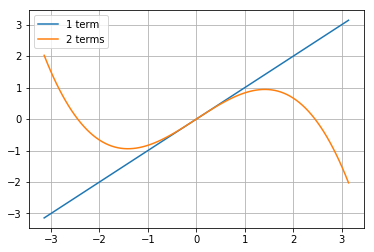

In [33]:
twoterm = [x - (1/math.factorial(3))* (x**3) for x in xs]
plt.plot(xs, xs, label="1 term")
plt.plot(xs,twoterm, label="2 terms")
plt.legend()
plt.grid()

9) Plot the $\sin$ function and the taylor series approximations(1,2,3,4 terms ) on the same axis. You can see that we get more and more accurate as we add more terms.

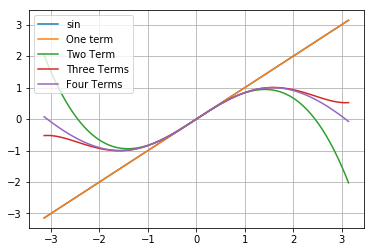

In [36]:
threeterm = [(1/math.factorial(5))* (x**5) for x in xs]
threeterm = np.add(twoterm, threeterm)
fourterm = [(1/math.factorial(7))* (x**7) for x in xs]
fourterm = np.subtract(threeterm, fourterm)
plt.plot(xs, xs, label="sin")
plt.plot(xs, xs, label="One term")
plt.plot(xs, twoterm, label="Two Term")
plt.plot(xs, threeterm, label="Three Terms")
plt.plot(xs, fourterm, label="Four Terms")
plt.legend()
plt.grid()

10) If we use only the first term in the approximation, what is the bound on the error for approximating $\sin(0.5)$. Verify this numerically as well.

In [11]:
x = 0.5
accuracy = lambda y, z: (y)/math.factorial(z)
taylorfx = lambda x, y: x + accuracy(y, 2) * x**2
print(taylorfx(x, math.sin(-1)))
print(taylorfx(x, math.sin(1)))

0.625
0.5675377882335175


11) If we want to approximate $\sin(0.5)$ that is accurate up to $10^{-7}$. How many terms do we need?

In [13]:
error_for_n_terms = lambda n, x: x**n/math.factorial(n+1)

for i in range(30):
    if (error_for_n_terms(i, 0.5) < 1e-7):
        print(i)
        break

8


12) Why is this expression false.

In [6]:
x = 1e-10
print (x)
print ((1+x)-1 == x)

1e-10
False


# Exercise/First week homework

1) Plot $\cos(x)$ from $-\pi$ to $\pi$ along with the Taylor approximation using (1,2,3,4) terms.

2)How accurate is $\cos(0.1)$ using 4 non zero terms?

3) How many terms do I need to calculate cos(0.1) that is accurate up to $10^{-7}$

4) Plot $\ln (1+x)$ from $-0.5$ to $0.5$ along with the Taylor approximation using (1,2,3,4) terms.

5)If you calculate $\ln(1.5)$ using 3 terms. How accurate is your answer?

6)How many terms do I need to calculate $\ln(1.5)$ with accuracy of $10^{-7}$

7) Notice that $\tan(1) = \pi/4 $, this means we can calculate $\pi$ by using $4 \times \arctan(1)$

So this means that if we find Taylor series expansion of $\arctan(x)$ around $x=0$, then we can calculate $\pi$ to any accuracy we want.

7.1) Find taylor expansion of $\arctan$ for 3 non-zero terms. If you forgot,
$\begin{align}
\frac{d}{dx} \arctan(x) = \frac{1}{1+x^2}
\end{align}$


7.2) Guess the rest of the terms

7.3) Calculate $\pi$ using taylor approximation for 10 terms.

7.4)Real Challenge: What is the error bound on the value of $\pi$ you calculated with taylor approximation above? Use wolfram alpha if needed.